In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import keras
warnings.filterwarnings('ignore')

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline


print('Libraries Imported')

Libraries Imported


In [2]:
df = pd.read_csv("houseprices.csv")
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [3]:
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [4]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [5]:
df.shape

(33656, 19)

In [6]:
df.dtypes

ADDRESS              object
SUBURB               object
PRICE                 int64
BEDROOMS              int64
BATHROOMS             int64
GARAGE              float64
LAND_AREA             int64
FLOOR_AREA            int64
BUILD_YEAR          float64
CBD_DIST              int64
NEAREST_STN          object
NEAREST_STN_DIST      int64
DATE_SOLD            object
POSTCODE              int64
LATITUDE            float64
LONGITUDE           float64
NEAREST_SCH          object
NEAREST_SCH_DIST    float64
NEAREST_SCH_RANK    float64
dtype: object

Data Preprocessing 

In [7]:
df.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

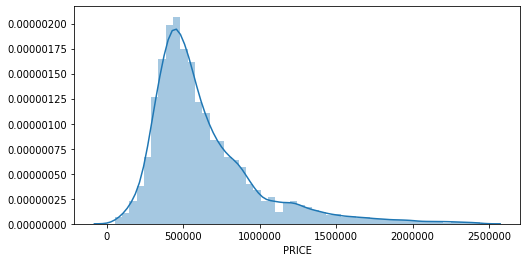

In [8]:
plt.figure(figsize=(8,4))
sns.distplot(df['PRICE'])
plt.show()

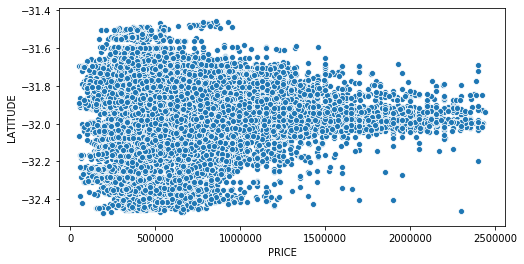

In [9]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="PRICE", y="LATITUDE", data=df)
plt.show()

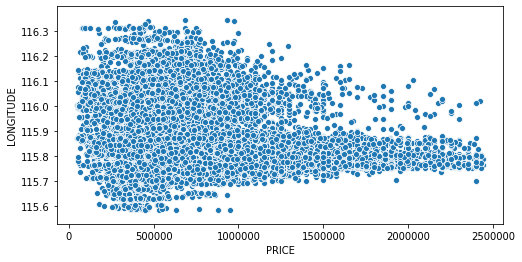

In [10]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="PRICE", y="LONGITUDE", data=df)
plt.show()

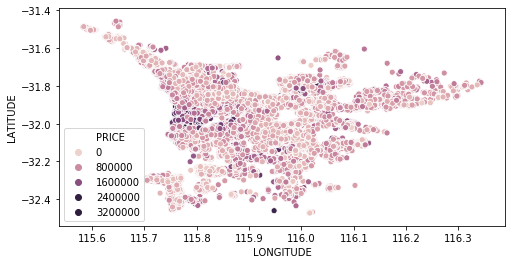

In [11]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df, hue="PRICE")
plt.show()

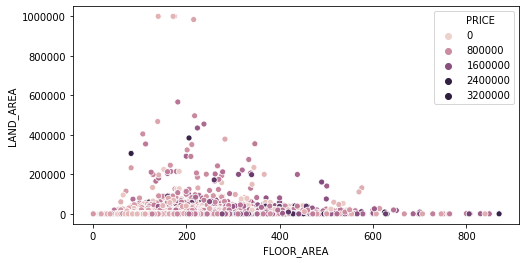

In [12]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="FLOOR_AREA", y="LAND_AREA", data=df, hue="PRICE")
plt.show()

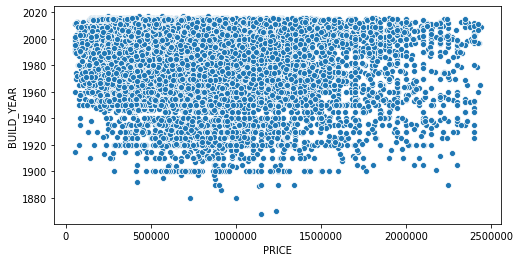

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="PRICE", y="BUILD_YEAR", data=df)
plt.show()

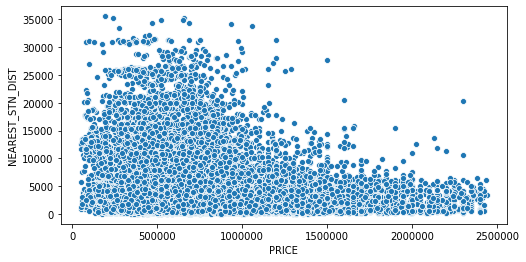

In [14]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="PRICE", y="NEAREST_STN_DIST", data=df)
plt.show()

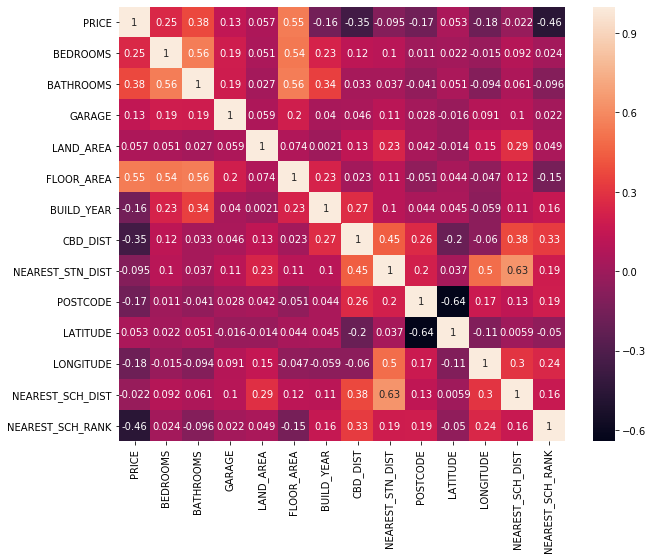

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
def preprocess(df):
    df = df.copy()
    
    #Drop columnn with high cardinality
    df = df.drop('ADDRESS', axis = 1)
    df = df.drop('NEAREST_STN', axis = 1)
    
    #Drop columns which have more than 25% missing in the dataset
    val = (round(df.isnull().sum()/len(df),2)>0.25)
    col = list(val[val==True].index)
    df = df.drop(col, axis =1)
    
    df['BUILD_YEAR'] = df['BUILD_YEAR'].fillna(df['BUILD_YEAR'].median())
    df['GARAGE'] = df['GARAGE'].fillna(df['GARAGE'].median())
    
    df['DATE_SOLD'] = pd.to_datetime(df['DATE_SOLD'])
    df['YEAR'] = df['DATE_SOLD'].apply(lambda x:x.year)
    df['MONTH'] =  df['DATE_SOLD'].apply(lambda x:x.month)
    
    return df

In [17]:
df = preprocess(df)

In [18]:
df.isnull().sum()

SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
YEAR                0
MONTH               0
dtype: int64

In [19]:
df = df.select_dtypes(include='number')

In [20]:
df.columns

Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'YEAR', 'MONTH'],
      dtype='object')

In [22]:
df_norm = (df-df.mean())/df.std()

In [23]:
y = df_norm.iloc[:,:1]

In [24]:
x = df_norm.iloc[:,1:15]

In [25]:
df_norm.isnull().sum()

PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN_DIST    0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH_DIST    0
YEAR                0
MONTH               0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [27]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))


In [29]:
model.compile(optimizer='adam', loss='mse')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose =1, patience =10)

history = model.fit(x=X_train, y=y_train.values, validation_data =(X_test, y_test.values), batch_size=128, epochs=400, callbacks=[early_stop])

Epoch 1/400
185/185 [==============================] - 1s 3ms/step - loss: 2.1280 - val_loss: 1.0119
Epoch 2/400
185/185 [==============================] - 0s 2ms/step - loss: 1.0388 - val_loss: 0.9502
Epoch 3/400
185/185 [==============================] - 0s 1ms/step - loss: 0.9130 - val_loss: 0.8728
Epoch 4/400
185/185 [==============================] - 0s 2ms/step - loss: 0.8560 - val_loss: 0.8359
Epoch 5/400
185/185 [==============================] - 0s 2ms/step - loss: 0.8155 - val_loss: 0.8031
Epoch 6/400
185/185 [==============================] - 0s 2ms/step - loss: 0.8058 - val_loss: 0.7896
Epoch 7/400
185/185 [==============================] - 0s 1ms/step - loss: 0.7608 - val_loss: 0.7549
Epoch 8/400
185/185 [==============================] - 0s 1ms/step - loss: 0.7651 - val_loss: 0.7350
Epoch 9/400
185/185 [==============================] - 0s 1ms/step - loss: 0.7632 - val_loss: 0.7081
Epoch 10/400
185/185 [==============================] - 0s 1ms/step - loss: 0.7184 - val_lo

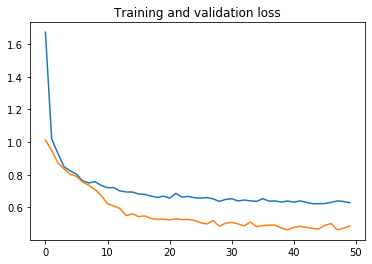

In [31]:
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss)) 

plt.plot  ( epochs, loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
predictions = model.predict(X_test)

In [34]:
mean_absolute_error(y_test, predictions)

0.48209652437110895

In [35]:
np.sqrt(mean_absolute_error(y_test, predictions))

0.6943317106190016